test Kommentar

In [154]:
#Bib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import *
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import *
import plotly_express as px
from sklearn import metrics, tree 
from imblearn.over_sampling import RandomOverSampler 
from sklearn.metrics import *
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus      
from mlxtend.frequent_patterns import apriori, association_rules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import binary_accuracy


#CSV File lesen
data = pd.read_csv("Gehalt.csv")
data.head(5)


,Alt,Arbeitsbereich,GewichtungsZensus,Bildung,Bildungsnum,Ehestatus,Beruf,Beziehung,Rasse,Sex,Kapitalgewinn,Kapitalverluste,Stundenprowoche,Land,Einkommen
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [155]:
#prüf die Null werte
data.isnull().sum()

Alt                  0
Arbeitsbereich       0
GewichtungsZensus    0
Bildung              0
Bildungsnum          0
Ehestatus            0
Beruf                0
Beziehung            0
Rasse                0
Sex                  0
Kapitalgewinn        0
Kapitalverluste      0
Stundenprowoche      0
Land                 0
Einkommen            0
dtype: int64

In [156]:
#such für unnormal werte in spalte Arbeitsbereich => ?
data['Arbeitsbereich'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Arbeitsbereich, dtype: int64

In [157]:
#vertausche die ? werte 
data.replace('?' ,np.NaN ,inplace=True)
data['Arbeitsbereich'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Arbeitsbereich, dtype: int64

In [158]:
#prüfung, wie viel Lände in der Spalte
data['Land'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [159]:
#such für 0 Werte in spalten und vertauschen mit Werte
data['Arbeitsbereich'].fillna(data['Arbeitsbereich'].mode()[0], inplace=True)
data['Beruf'].fillna(data['Beruf'].mode()[0], inplace=True)
data['Land'].fillna(data['Land'].mode()[0], inplace=True)   
data.isnull().sum()


Alt                  0
Arbeitsbereich       0
GewichtungsZensus    0
Bildung              0
Bildungsnum          0
Ehestatus            0
Beruf                0
Beziehung            0
Rasse                0
Sex                  0
Kapitalgewinn        0
Kapitalverluste      0
Stundenprowoche      0
Land                 0
Einkommen            0
dtype: int64

In [160]:
#schau wie viel Personen größer als 50 und weniger
data['Einkommen'].value_counts()

 <=50K    24720
 >50K      7841
Name: Einkommen, dtype: int64

In [161]:
#trennen die Spalten für zwei Variable X und Y
X = data.drop('Einkommen' ,axis=1)
Y = data['Einkommen']

X.columns


Index(['Alt', 'Arbeitsbereich', 'GewichtungsZensus', 'Bildung', 'Bildungsnum',
       'Ehestatus', 'Beruf', 'Beziehung', 'Rasse', 'Sex', 'Kapitalgewinn',
       'Kapitalverluste', 'Stundenprowoche', 'Land'],
      dtype='object')

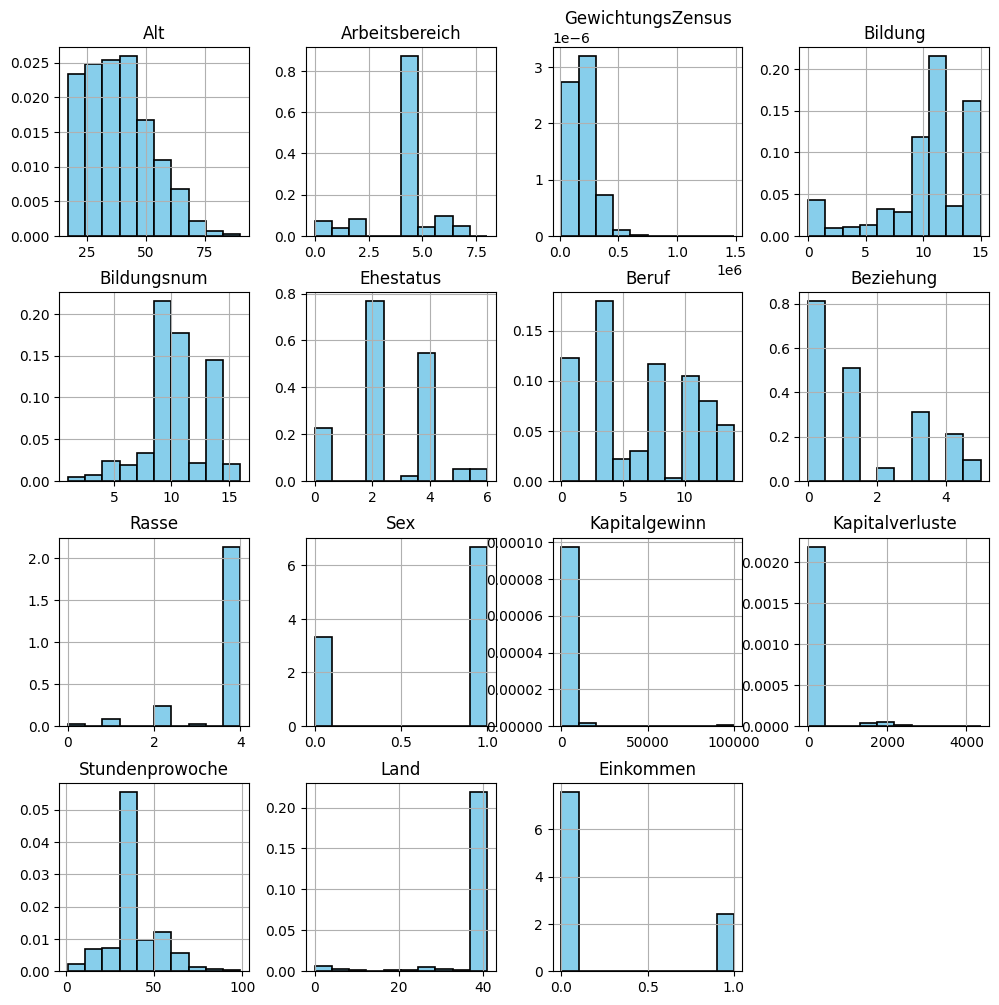

In [187]:
#allgemeine Info für Spalten als Diagramm
#TODO nach die Ausführung , diese Block allein ausführen um alle spalten zu zeigen
info = data.hist(edgecolor = 'black', linewidth = 1.2, density=True,color = 'skyblue')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()


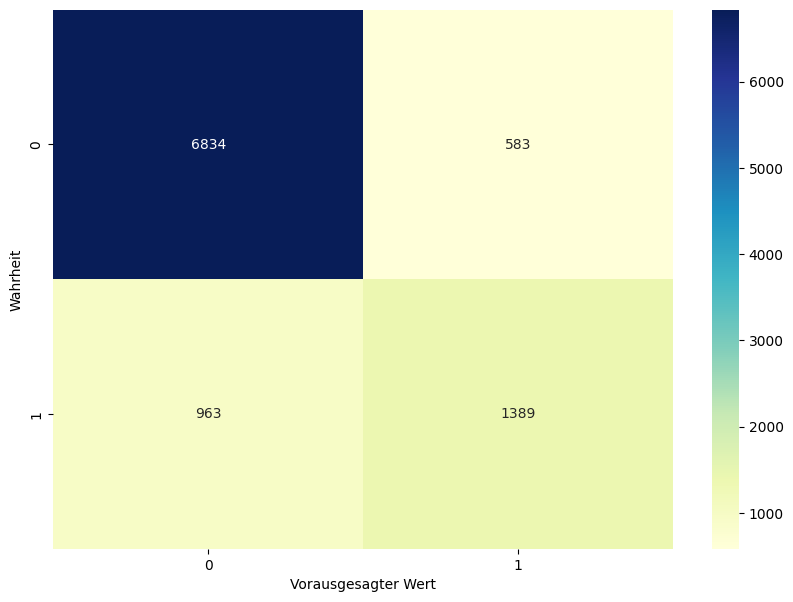

In [163]:
#Model Training
# rs : Bewertet Statistiken, um Ausreißer in Griff zu bekommen und Relativ komplexer Scaler mit meist sehr guten Ergebnissen
# gNB: sklearn.naive_bayes
#    -> hier Data training und danach mit Hilfe GaussianNB als Diagramm zeigen (X_train ,Y_train)

X_MT=pd.get_dummies(X ,columns=['Arbeitsbereich' ,'Bildung' ,'Ehestatus' ,'Beruf' ,'Beziehung' ,'Rasse' ,'Sex' ,'Land'])
rs = RobustScaler()
X_MT =rs.fit_transform(X_MT)
X_train ,X_test , Y_train , Y_test = train_test_split(X_MT ,Y ,test_size=0.3 ,random_state=42  ,stratify=Y)
data_DTC = DecisionTreeClassifier(criterion="gini",max_depth=20,min_samples_leaf=5)
data_DTC.fit(X_train,Y_train)
y_data_DTC = data_DTC.predict(X_test)
cm = confusion_matrix(Y_test, y_data_DTC)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d",cmap="YlGnBu")
plt.xlabel("Vorausgesagter Wert")
plt.ylabel("Wahrheit")
plt.show()



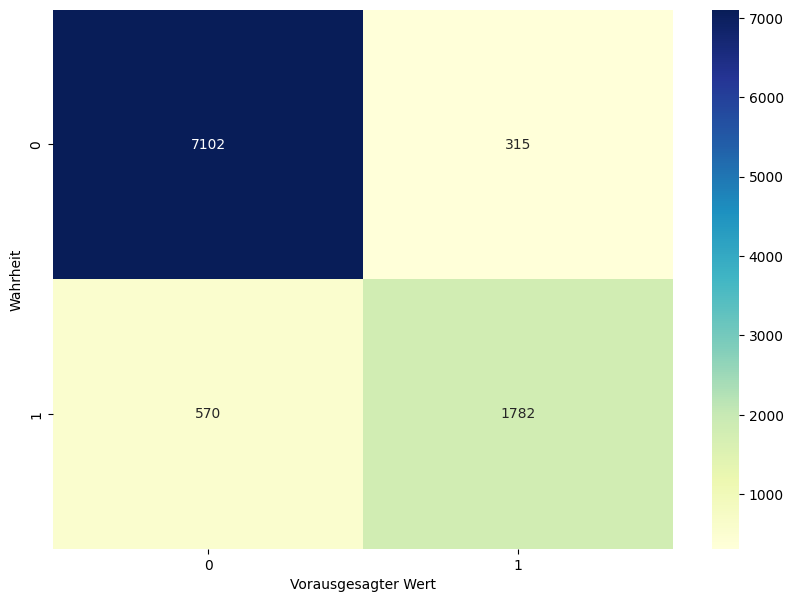

In [164]:
data_DTC = DecisionTreeClassifier(criterion="gini",max_depth=20,min_samples_leaf=5)
data_DTC.fit(X_test,Y_test)
y_data_DTC = data_DTC.predict(X_test)
cm = confusion_matrix(Y_test, y_data_DTC)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d",cmap="YlGnBu")
plt.xlabel("Vorausgesagter Wert")
plt.ylabel("Wahrheit")
plt.show()

In [165]:
#hier wird Genauigkeit Rückruf f1-Score Unterstützung ausdrucken
gNB = GaussianNB()
gNB.fit(X_train, Y_train)
print(classification_report(Y_test, gNB.predict(X_test)))

              precision    recall  f1-score   support

       <=50K       0.94      0.79      0.86      7417
        >50K       0.56      0.83      0.67      2352

    accuracy                           0.80      9769
   macro avg       0.75      0.81      0.76      9769
weighted avg       0.84      0.80      0.81      9769



In [166]:
# Erstellung von Pandas-Serien für die Arbeitsklassen mit einem Einkommen von über 50.000 
df = data.loc[data['Einkommen'] == '>50K',['Arbeitsbereich']]
Arbeitsbereich_type = df['Arbeitsbereich'].value_counts()
labels = list(Arbeitsbereich_type.index)
aggregate = list(Arbeitsbereich_type)

fig = px.pie(data, 'Einkommen', title='Kreisdiagramm - Einkommen').update_traces(hoverinfo='value', textinfo='percent+value', textfont_size=20)
fig.show()

C:\Users\Hashem\AppData\Roaming\Python\Python310\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\Hashem\AppData\Roaming\Python\Python310\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [167]:
# Berechnung mit Hilfe der Trainingsdaten und neu Daten
# Genauigkeit
dataF = pd.read_csv("Gehalt.csv")
map = {" <=50K":1, " >50K":2}
dataF.Einkommen = [map[item] for item in dataF.Einkommen]

X = pd.DataFrame(dataF[["Alt","Bildungsnum","Stundenprowoche"]]).reset_index()
y = dataF.Einkommen 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=16)
print("Es gibt {} Trainingssätze und {} Testsätze".format(X_train.shape[0],X_test.shape[0]))
modell = GaussianNB()
modell.fit(X_train,y_train)               
y_vorhersage = modell.predict(X_test) 
print("Die Genauigkeit ist {:.1f}%".format(100*np.mean(y_vorhersage == y_test)))
prognose = modell.predict([[1,25,100,True]])
print(prognose)

Es gibt 26048 Trainingssätze und 6513 Testsätze
Die Genauigkeit ist 80.1%
[1]


c:\Program Files\Python310\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



In [168]:
# erstellt Variablen X,y und mit Random-Funktion verbinden 
le = LabelEncoder()
data['Einkommen'] = le.fit_transform(data['Einkommen'])

for col in data.columns:
    if data[col].dtypes == 'object':
        le = LabelEncoder()
        
        data[col] = le.fit_transform(data[col].astype(str))
data.corr()
X = data.drop(["GewichtungsZensus","Bildung","Ehestatus","Beziehung","Land"],axis=1)
X = data.drop("Einkommen",axis=1)
y = data.Einkommen
y.value_counts(normalize=True)
# Ausgleich der schiefen Daten
rs = RandomOverSampler(random_state = 20)
rs

RandomOverSampler(random_state=20)

In [169]:
# daten in Integer Type umwendeln
# und trennen die daten zu Train und Test mit Random-Variabel
X_new,y_new = rs.fit_resample(X, y)
y_new.value_counts(normalize=True)
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=30)
print(X_train.dtypes)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Alt                  int64
Arbeitsbereich       int32
GewichtungsZensus    int64
Bildung              int32
Bildungsnum          int64
Ehestatus            int32
Beruf                int32
Beziehung            int32
Rasse                int32
Sex                  int32
Kapitalgewinn        int64
Kapitalverluste      int64
Stundenprowoche      int64
Land                 int32
dtype: object
X_train shape: (34608, 14)
X_test shape: (14832, 14)
y_train shape: (34608,)
y_test shape: (14832,)


In [170]:
# rf: RandomForestClassifier  verbessert meist die Qualität der Ergebnisse 
# Der F1-Score kann als harmonisches Mittel aus Präzision und Recall interpretiert werden
# Supervised
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
svc = SVC()

#GaussianNB
gNB.fit(X_train,y_train)
y_pred_gn = gNB.predict(X_test)

#RandomForestClassifier
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

#DecisionTreeClassifier
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

#SVC
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

print("GaussianNB")
print('Genauigkeitsgrad:', round(accuracy_score(y_test, y_pred_gn) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_gn) * 100,3))
print("Mittlerer quadratischer Fehler: ", round(mean_squared_error(y_test,y_pred_gn) * 100,3))

print("RandomForestClassifier:")
print('Genauigkeitsgrad:', round(accuracy_score(y_test, y_pred_rf) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_rf) * 100,3))
print("Mittlerer quadratischer Fehler: ", round(mean_squared_error(y_test,y_pred_rf) * 100,3))

print("DecisionTreeClassifier:")
print('Genauigkeitsgrad:', round(accuracy_score(y_test, y_pred_dt) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_dt) * 100,3))
print("Mittlerer quadratischer Fehler: ", round(mean_squared_error(y_test,y_pred_dt) * 100,3))

print("SVM:")
print('Genauigkeitsgrad:', round(accuracy_score(y_test, y_pred_svc) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_svc) * 100,3))
print("Mittlerer quadratischer Fehler: ", round(mean_squared_error(y_test,y_pred_svc) * 100,3))

GaussianNB
Genauigkeitsgrad: 62.999
F1 Score:  45.262
Mittlerer quadratischer Fehler:  37.001
RandomForestClassifier:
Genauigkeitsgrad: 92.442
F1 Score:  92.678
Mittlerer quadratischer Fehler:  7.558
DecisionTreeClassifier:
Genauigkeitsgrad: 90.885
F1 Score:  91.279
Mittlerer quadratischer Fehler:  9.115
SVM:
Genauigkeitsgrad: 59.21
F1 Score:  32.099
Mittlerer quadratischer Fehler:  40.79


2 Cluster: 6 Iterationen


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


4 Cluster: 10 Iterationen


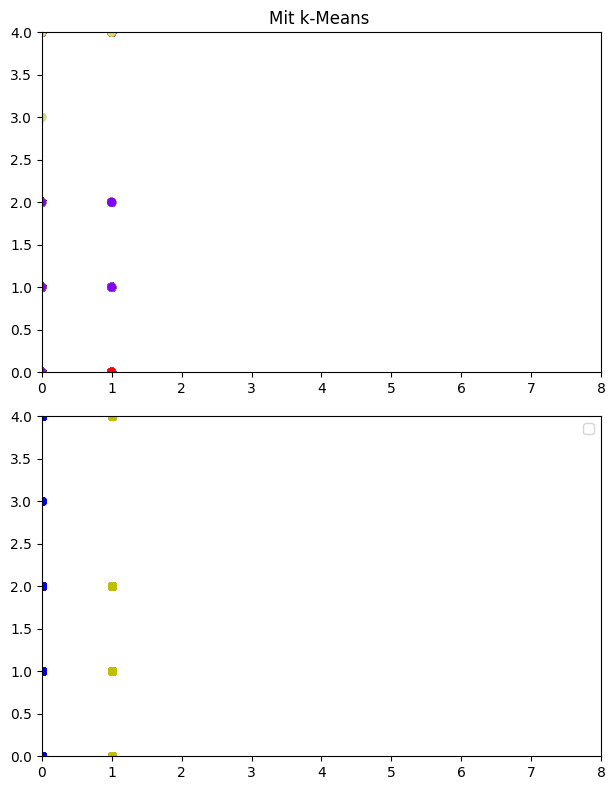

[1 1 1 ... 1 1 0]


In [171]:
# KMeans
# Berechnung mit Hilfe der Daten aus DataFrame 
# errechnete Zugehörigkeit
# aber nicht ganz richtig
X1 = data.drop(["GewichtungsZensus","Bildung","Ehestatus","Beziehung","Land"],axis=1)
X1 = data.drop("Einkommen",axis=1)
y1 = data.Einkommen
y1.value_counts(normalize=True)
berechnung = KMeans(n_clusters=2, init="random", algorithm="elkan")
berechnung.fit(X1)                        
labels = berechnung.labels_            
print("2 Cluster: {} Iterationen".format(berechnung.n_iter_))
berechnung2 = KMeans(n_clusters=4)
berechnung2.fit(X1)                        
labels2 = berechnung2.labels_             
print("4 Cluster: {} Iterationen".format(berechnung2.n_iter_))
bild = plt.figure(num="Gehalt",figsize=(12,8))

inhalt = bild.add_subplot(222)         
inhalt.scatter(y1, X1.Arbeitsbereich, c=labels2, s=30, cmap="rainbow")      
inhalt.scatter(berechnung2.cluster_centers_[:,2], berechnung2.cluster_centers_[:,3], c='k', s=50)
inhalt.set_title("Mit k-Means ")
inhalt.axis([0,8,0,4])

inhalt1 = bild.add_subplot(224)         
inhalt1.scatter(y1[y==0], X1[y==0].Arbeitsbereich, c='b', s=30)      
inhalt1.scatter(y1[y==1], X1[y==1].Arbeitsbereich, c='y', s=30)      
inhalt1.axis([0,8,0,4])
inhalt1.legend()


bild.tight_layout()     
plt.show()
print(labels)


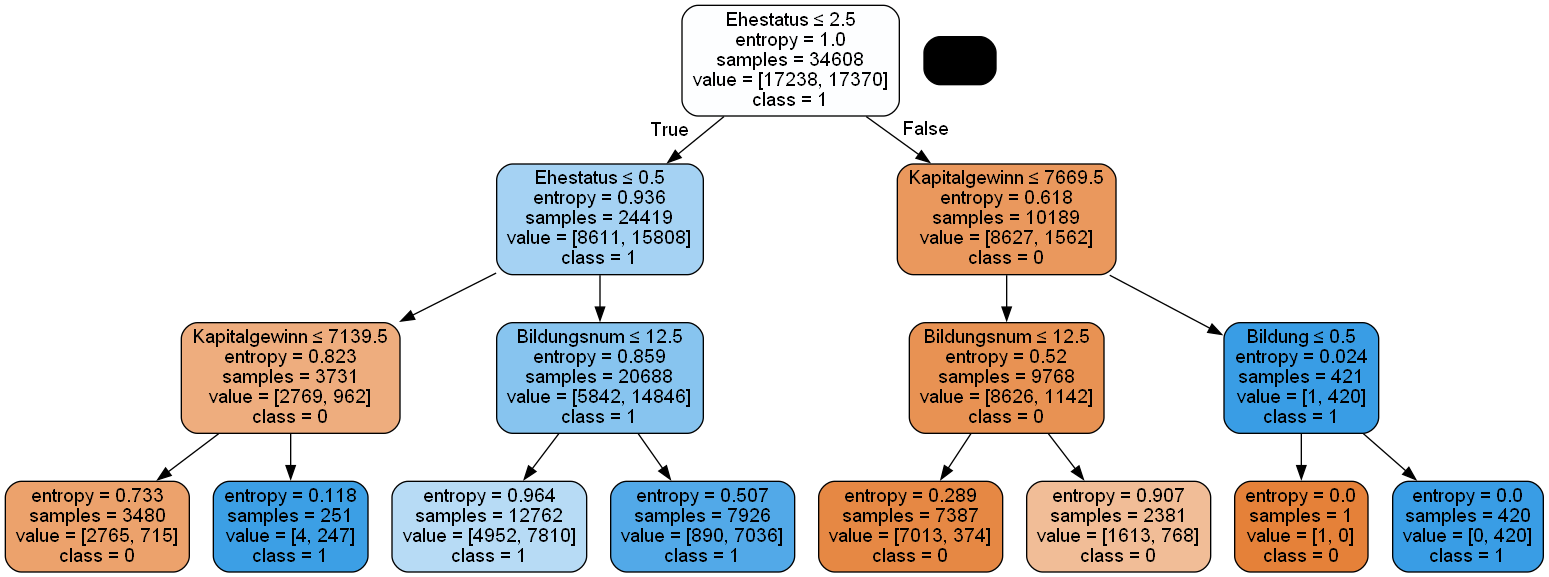

In [172]:
#DecisionTreeClassifier erstellen und entscheiden die werte 1
              
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)
features=X.columns
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,filled=True, rounded=True,special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_set.png')
Image(graph.create_png())

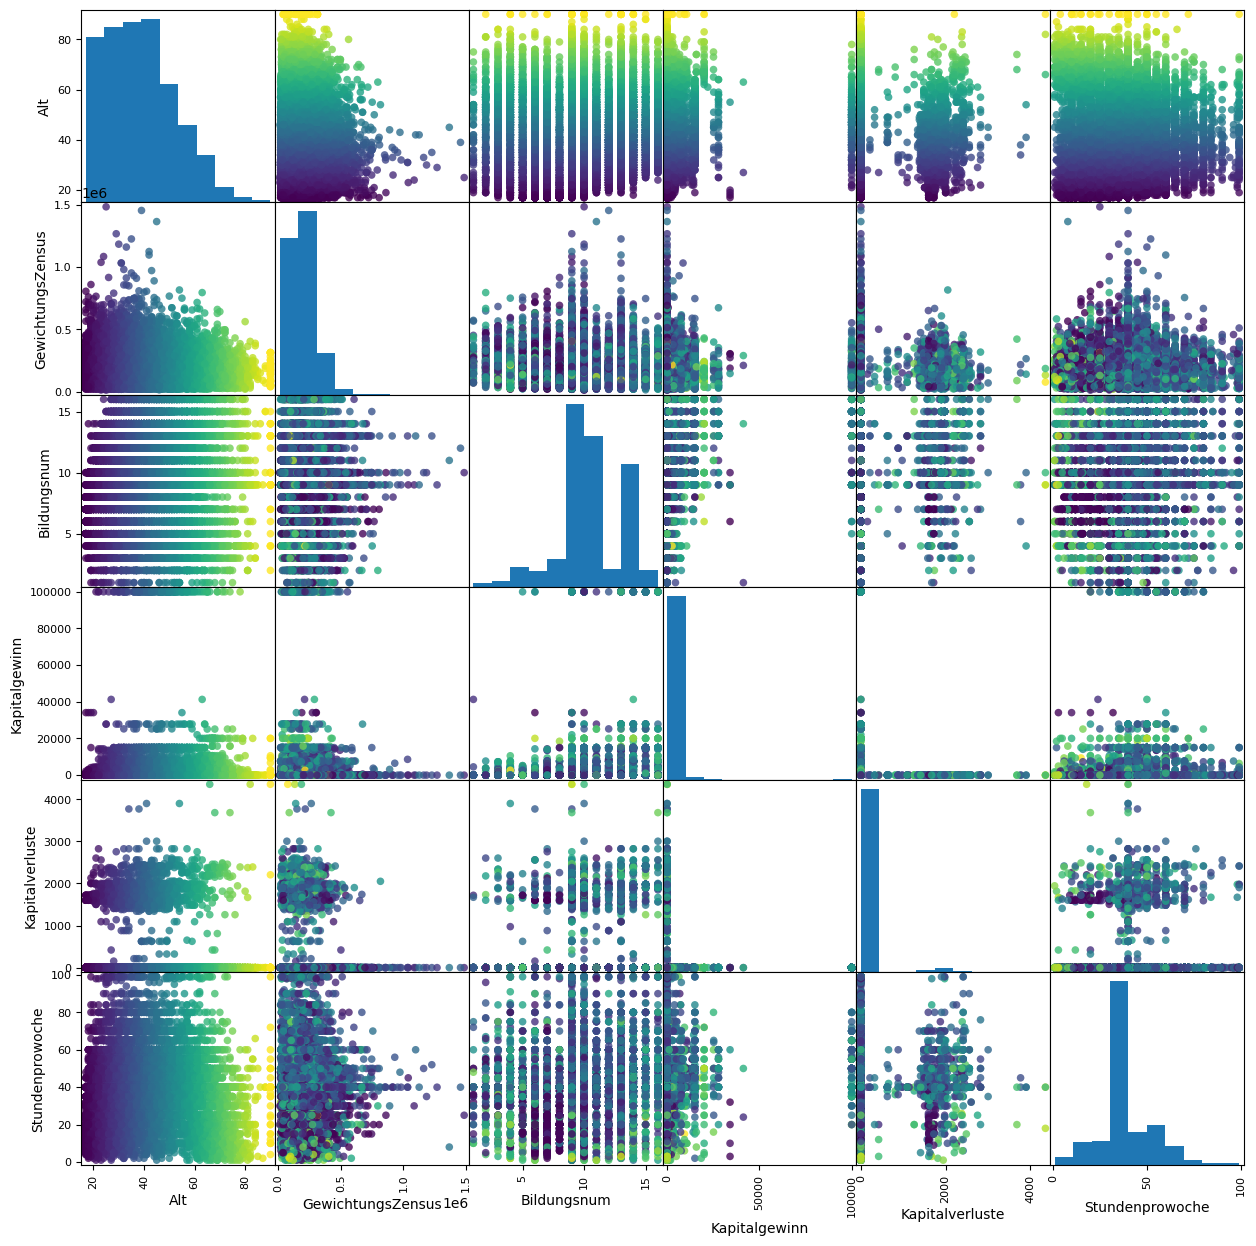

In [173]:
#Neuronale Netze
#
datenNN = pd.read_csv('Gehalt.csv', skipinitialspace=True, comment="\t")
# Daten aufbereiten 
datenNN = datenNN[datenNN.Stundenprowoche != '?']               # entsprechende Zeilen herausfiltern
datenNN.Stundenprowoche = datenNN.Stundenprowoche.astype(float)    # Typ-Konvertierung in Float

# Scattermatrix ausgeben
pd.plotting.scatter_matrix(datenNN, c = datenNN.Alt.values,          #Farbe: große Werte (hoher mpg) heller
                                 figsize=(15, 15),
                                 marker = 'o',          #Kreise statt Punkte
                                 s = 30,                #Größe der Kreise
                                 alpha = 0.8)           #Transparenz
plt.show()

In [174]:
# Viele Daten machen keinen Sinn (Kapitalgewinn,Kapitalverluste,Bildungsnum,GewichtungsZensus)
# Aber die Spalten Alt und Stundenprowoche sind interessant. 

X = datenNN[["Stundenprowoche"]]
y = datenNN[["Alt"]]

# Zerlegen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y) 

# Transformieren
# Transformieren mit einem Scaler:
sc = MinMaxScaler()                         # Initiieren des Skalierers
X_train_sc = sc.fit_transform(X_train)      # Die X-Daten werden überprüft (fit) und dann transformiert
X_test_sc = sc.transform(X_test)            # nur noch transformieren, fit wurde schon ausgeführt

# große y-Werte zusätzlich mit einem eigenen Scaler transformieren:
sc_y = MinMaxScaler()
y_train_sc = sc_y.fit_transform(y_train)
y_test_sc = sc_y.transform(y_test)

In [175]:

# Definition des Keras Modells
model = Sequential()                    # Eine Schicht nach der anderen definieren
model.add(Dense(12, input_dim=X_train.shape[1], activation="relu", name="Input"))    # Eingabeschicht, mit den Spalten von X_train
model.add(Dense(20, activation="relu", name="Schicht_1"))                            # Versteckte Schicht
model.add(Dense(1, activation="linear", name="Output"))                              # Ausgabeschicht

# Compilieren des Modells
model.compile(optimizer="adam", loss="mse", metrics=["mae"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 12)                24        
                                                                 
 Schicht_1 (Dense)           (None, 20)                260       
                                                                 
 Output (Dense)              (None, 1)                 21        
                                                                 
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________


In [176]:
# Modell trainieren mit 100 Durchläufen
historie = model.fit(X_train_sc, y_train_sc, epochs=100, batch_size=32, validation_data=(X_test_sc, y_test_sc), verbose=0)

# Modell evaluieren
def eval(X, y):
    ergebnis = model.evaluate(X, y, verbose = 0)
    y_vorhersage = model.predict(X)
    print("{}: {:.2f}\n{}: {:.2f}".format(model.metrics_names[0], ergebnis[0],model.metrics_names[1], ergebnis[1]))
    print("R2: {:.2f}".format(r2_score(y, y_vorhersage)))
print("Trainingsdaten:")
eval(X_train_sc, y_train_sc)      # Evaluierung der Trainingsdaten
print("Testdaten:")
eval(X_test_sc, y_test_sc)        # Evaluierung der Testdaten
historie.history.keys()

Trainingsdaten:
764/764 [==============================] - 1s 890us/step
loss: 0.03
mae: 0.15
R2: 0.02
Testdaten:
255/255 [==============================] - 0s 886us/step
loss: 0.03
mae: 0.15
R2: 0.02


dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

        loss       mae  val_loss   val_mae
0   0.036255  0.153944  0.034640  0.152567
1   0.034894  0.152611  0.034976  0.151678
2   0.034932  0.152729  0.034587  0.152790
3   0.034852  0.152682  0.034693  0.153535
4   0.034801  0.152521  0.034550  0.151784
..       ...       ...       ...       ...
95  0.034328  0.151419  0.034281  0.150608
96  0.034342  0.151396  0.034056  0.150916
97  0.034327  0.151364  0.034208  0.151751
98  0.034342  0.151424  0.034140  0.152236
99  0.034341  0.151490  0.034229  0.152093

[100 rows x 4 columns]
------ Lernen des Netzes plotten --------


C:\Users\Hashem\AppData\Local\Temp\ipykernel_19304\3208541200.py:19: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



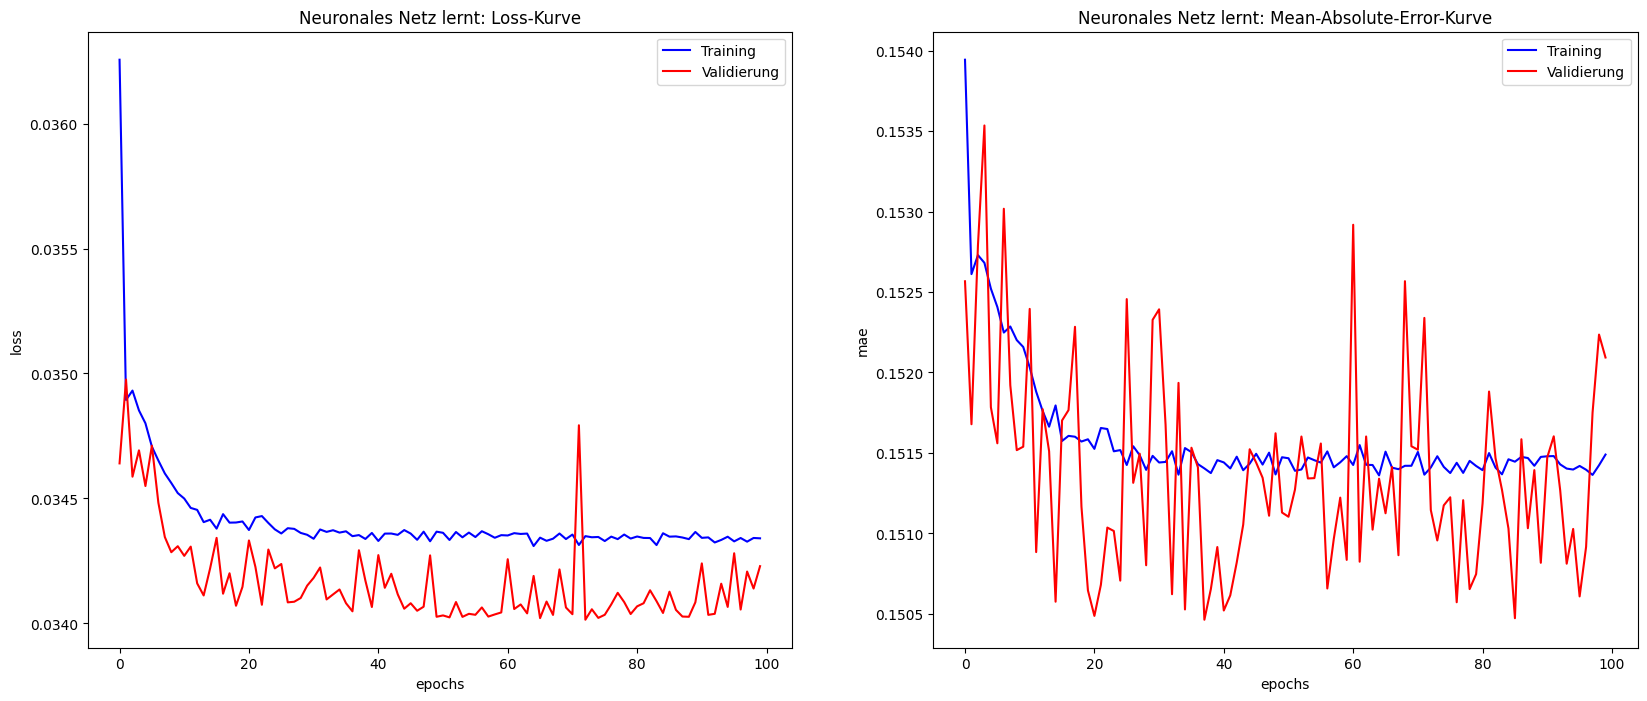

In [177]:
auswertung = pd.DataFrame.from_dict(historie.history)         # Fit Daten in DataFrame umwandeln
print(auswertung)
print("------ Lernen des Netzes plotten --------")
fig = plt.figure(figsize=(20,8), num="Neuronales Netz")
bild1 = fig.add_subplot(121)
bild1.plot(auswertung.index, auswertung.iloc[:,0], color = 'blue')    
bild1.plot(auswertung.index, auswertung.iloc[:,2], color = 'red')
bild1.legend(['Training','Validierung'])    
bild1.set_xlabel('epochs')
bild1.set_ylabel(model.metrics_names[0])
bild1.set_title("Neuronales Netz lernt: Loss-Kurve")
bild2 = fig.add_subplot(122)
bild2.plot(auswertung.index, auswertung.iloc[:,1], color = 'blue')    
bild2.plot(auswertung.index, auswertung.iloc[:,3], color = 'red')    
bild2.legend(['Training','Validierung'])    
bild2.set_xlabel('epochs')
bild2.set_ylabel(model.metrics_names[1])
bild2.set_title("Neuronales Netz lernt: Mean-Absolute-Error-Kurve")
fig.show()

In [178]:
#Assoziationsanalyse
df = pd.read_csv("Gehalt.csv", sep=",")
df = pd.DataFrame(df[["Arbeitsbereich","Land","Einkommen"]])
print("Zeilen und Spalten:",df.shape)
df.head(5)



Zeilen und Spalten: (32561, 3)


,Arbeitsbereich,Land,Einkommen
0,State-gov,United-States,<=50K
1,Self-emp-not-inc,United-States,<=50K
2,Private,United-States,<=50K
3,Private,United-States,<=50K
4,Private,Cuba,<=50K


In [179]:
df2 = pd.melt(df, ignore_index=False, value_name="item")[["item"]].dropna()
df2

,item
0,State-gov
1,Self-emp-not-inc
2,Private
3,Private
4,Private
...,...
32556,<=50K
32557,>50K
32558,<=50K
32559,<=50K


In [180]:
#Anzahl der Artikel
anzahl = df2["item"].value_counts()
print("\nAnzahl der Artikel: {}\n".format(anzahl.count()))


Anzahl der Artikel: 52



In [181]:
anzahl

 United-States                 29170
 <=50K                         24720
 Private                       22696
 >50K                           7841
 Self-emp-not-inc               2541
 ?                              2419
 Local-gov                      2093
 State-gov                      1298
 Self-emp-inc                   1116
 Federal-gov                     960
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 

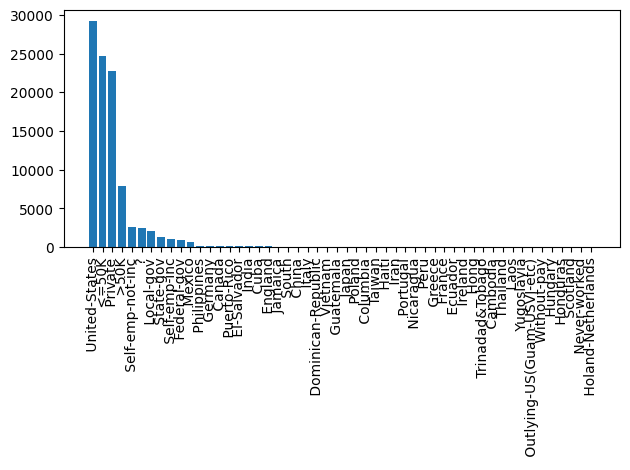

In [182]:
#Visualisierung
plt.bar(anzahl.index, anzahl)
plt.xticks(rotation=90)                 # Rotation der x-Achsen-Beschriftung
plt.tight_layout()                      # Verbessert die Anzeige
plt.show()

In [183]:
df2

,item
0,State-gov
1,Self-emp-not-inc
2,Private
3,Private
4,Private
...,...
32556,<=50K
32557,>50K
32558,<=50K
32559,<=50K


In [184]:
# für Pivotierung benötigen wir ein Werte-Spalte
# duppel-werte löschen
df2 = df2.drop_duplicates()  
df2["Anzahl"]=1                
pivot = pd.pivot(df2, columns="item", values="Anzahl").fillna(0)
pivot.head(10)

C:\Users\Hashem\AppData\Local\Temp\ipykernel_19304\2311706776.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



item,<=50K,>50K,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,...,Self-emp-not-inc,South,State-gov,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Without-pay,Yugoslavia
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [185]:
# alle Produkte mit Support > 5%:
haeufig = apriori(pivot, min_support=0.005, use_colnames=True)
absteigend = haeufig.sort_values("support", ascending=False)
absteigend.head(5)

c:\Program Files\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets
0,0.020408,( <=50K)
29,0.020408,( Local-gov)
31,0.020408,( Never-worked)
32,0.020408,( Nicaragua)
33,0.020408,( Outlying-US(Guam-USVI-etc))


In [186]:
regelnConf = association_rules(haeufig, metric="confidence", min_threshold=0.25)
regelnConf.sort_values('confidence', ascending = False, inplace = True)
regelnConf.iloc[:,:7].head(12) 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
0,( <=50K),( State-gov),0.020408,0.020408,0.020408,1.0,49.0
1,( State-gov),( <=50K),0.020408,0.020408,0.020408,1.0,49.0
2,( United-States),( <=50K),0.020408,0.020408,0.020408,1.0,49.0
3,( <=50K),( United-States),0.020408,0.020408,0.020408,1.0,49.0
4,( South),( ?),0.020408,0.020408,0.020408,1.0,49.0
5,( ?),( South),0.020408,0.020408,0.020408,1.0,49.0
6,( United-States),( State-gov),0.020408,0.020408,0.020408,1.0,49.0
7,( State-gov),( United-States),0.020408,0.020408,0.020408,1.0,49.0
8,"( United-States, <=50K)",( State-gov),0.020408,0.020408,0.020408,1.0,49.0
9,"( United-States, State-gov)",( <=50K),0.020408,0.020408,0.020408,1.0,49.0
